In [94]:
import pandas as pd
import numpy as np
%pip install plotly
%pip install nbformat --upgrade
%pip install seaborn


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [95]:
import plotly.express as px
import nbformat
import plotly.graph_objs as go
import scipy.stats as stats
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
ds_cleaned = pd.read_csv('/Users/strateford/Desktop/ITMO/1st_term/prog_for_chemists/study_project_antibiotics/data/df_cleaned_antibody.csv')

In [36]:
ds_cleaned

,SMILES,bacteria,MIC (µg/mL),MIC (µmol/mL),log MIC,S. aureus,molar_mass
0,N#CC=1C(=O)N(N=C(C2=NC=3C=CC=CC3N2)C)C(N=CC=4C...,Methicillin-resistant S. aureus (ATCC 43300),50.00,0.089133,1.950037,+,560.961
1,N#CC=1C(=O)N(N=C(C2=NC=3C=CC=CC3N2)C)C(N=CC=4C...,Methicillin-resistant S. aureus (ATCC 43300),12.50,0.020647,1.314859,+,605.412
2,N#CC=1C(=O)N(N=C(C2=NC=3C=CC=CC3N2)C)C(N=CC4=C...,Methicillin-resistant S. aureus (ATCC 43300),6.25,0.010324,1.013829,+,605.412
3,ClC1=CC=2N=C(Cl)N(C2C=C1Cl)C3CCCC3,methicillin-resistant S. aureus (MRSA),6.25,0.021582,1.334092,+,289.593
4,ClC1=CC=2N=C(Br)N(C2C=C1Cl)C3CCCC3,methicillin-resistant S. aureus (MRSA),6.25,0.018710,1.272076,+,334.044
...,...,...,...,...,...,...,...
927,N(=N/C1C(=O)N(N=C1C)C2=CC(Cl)=CC=C2)\C3=CC=C(C...,Staphylococcus aureus ATCC 9144,125.00,0.291455,2.464571,+,428.883
928,N(=N/C1C(=O)N(N=C1C)C2=CC(F)=CC=C2)\C3=CC=C(C=...,Staphylococcus aureus ATCC 9144,15.62,0.037873,1.578333,+,412.428
929,FC1=CC=C(C=C1)C2N(N=C(C=3C=CC(=CC3)NCN4C=NC=5C...,Staphylococcus aureus ATCC 9144,15.62,0.033843,1.529468,+,461.544
930,FC(F)(F)C1=CC=C(C=C1)C2N(N=C(C=3C=CC(=CC3)NCN4...,Staphylococcus aureus ATCC 9144,15.62,0.030535,1.484792,+,511.551


array([[<Axes: title={'center': 'MIC (µg/mL)'}>,
        <Axes: title={'center': 'MIC (µmol/mL)'}>],
       [<Axes: title={'center': 'log MIC'}>,
        <Axes: title={'center': 'molar_mass'}>]], dtype=object)

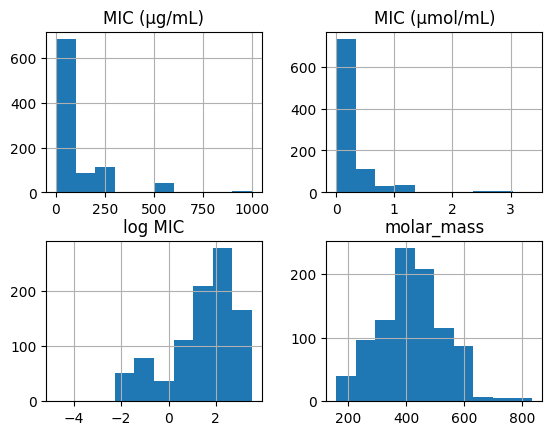

In [5]:
ds_cleaned.hist()

In [129]:
MIC_µmol_mL = "MIC (µmol/mL)"

data = ds_cleaned[MIC_µmol_mL]
hist = go.Histogram(x=data, nbinsx=40, name='Histogram', marker=dict(color='skyblue', line = dict(color='black', width = 1.5)))
layout = go.Layout(bargap=0.2, title='Гистограмма распределения значений MIC (µmol/mL)')
fig = go.Figure(data=[hist], layout=layout)

fig.show()


In [128]:
MIC_µg_mL = "MIC (µg/mL)"

data = ds_cleaned[MIC_µg_mL]
hist = go.Histogram(x=data, nbinsx=40, name='Histogram', marker=dict(color='skyblue', line = dict(color='black', width = 1.5)))
layout = go.Layout(bargap=0.2, title='Гистограмма распределения значений MIC (µg/mL)')
fig = go.Figure(data=[hist], layout=layout)

fig.show()

In [130]:
molar_mass = "molar_mass"

data = ds_cleaned[molar_mass]
hist = go.Histogram(x=data, nbinsx=40, name='Histogram', marker=dict(color='skyblue', line = dict(color='black', width = 1.5)))
layout = go.Layout(bargap=0.2, title='Гистограмма распределения значений molar_mass')
fig = go.Figure(data=[hist], layout=layout)

fig.show()

In [52]:
scatter_3d = go.Scatter3d(
    x=ds_cleaned['molar_mass'],  # Ось X
    y=ds_cleaned['MIC (µg/mL)'],   # Ось Y
    z=ds_cleaned['log MIC'],           # Ось Z
    mode='markers',
    marker=dict(
        size=5,
        color=ds_cleaned['molar_mass'],  # Цвет точек основан на весе молекул
        colorscale='Viridis',  # Цветовая схема
        opacity=0.8
    )
)

# Определение макета графика
layout = go.Layout(
    title='3D Scatter Plot: molar_mass vs MIC (µg/mL) vs log MIC',
    scene=dict(
        xaxis=dict(title='molar_mass'),
        yaxis=dict(title='MIC (µg/mL)'),
        zaxis=dict(title='log MIC')
    )
)

# Создание и отображение графика
fig = go.Figure(data=[scatter_3d], layout=layout)
fig.show()

In [76]:
molar_mass = 'molar_mass'  

# Извлечение данных столбца
data = ds_cleaned[molar_mass]

mu, std = norm.fit(data)
x = np.linspace(min(data), max(data), 100)
y = norm.pdf(x, mu, std)

   # Гистограмма
hist = go.Histogram(x=data, nbinsx=30, name='Histogram', marker=dict(color='skyblue', line = dict(color='black', width = 1.5)), histnorm='probability density', opacity=0.7)

   # Кривая гауссианы
gaussian_curve = go.Scatter(x=x, y=y, mode='lines', name='Gaussian Fit', line=dict(color='red'))

   # Создаем фигуру и визуализируем
layout = go.Layout(bargap=0.2)
fig = go.Figure(data=[hist, gaussian_curve])
fig.update_layout(title='Histogram of molar_mass with Gaussian Fit', xaxis_title='molar_mass', yaxis_title='Density')
fig.show()

In [80]:
MIC_µmol_mL = 'MIC (µmol/mL)'  

# Извлечение данных столбца
data = ds_cleaned[MIC_µmol_mL]

mu, std = norm.fit(data)
x = np.linspace(min(data), max(data), 100)
y = norm.pdf(x, mu, std)

   # Гистограмма
hist = go.Histogram(x=data, nbinsx=30, name='Histogram', marker=dict(color='skyblue', line = dict(color='black', width = 1.5)), histnorm='probability density', opacity=0.7)

   # Кривая гауссианы
gaussian_curve = go.Scatter(x=x, y=y, mode='lines', name='Gaussian Fit', line=dict(color='red'))

   # Создаем фигуру и визуализируем
layout = go.Layout(bargap=0.2)
fig = go.Figure(data=[hist, gaussian_curve])
fig.update_layout(title='Histogram of MIC_µmol/mL with Gaussian Fit', xaxis_title='molar_mass', yaxis_title='Density')
fig.show()

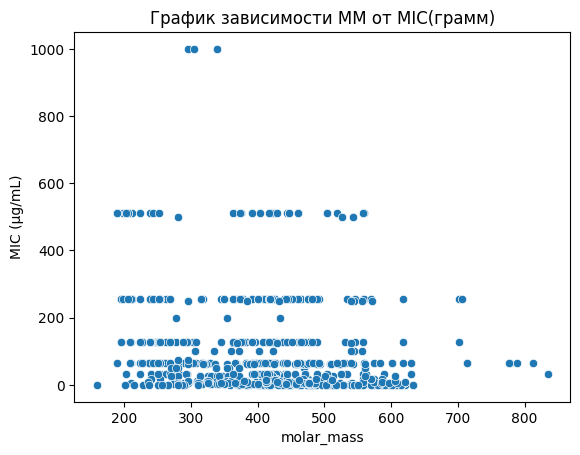

In [124]:

sns.scatterplot(x='molar_mass', y='MIC (µg/mL)', data=ds_cleaned)

plt.xlabel('molar_mass')
plt.ylabel('MIC (µg/mL)')

plt.title('График зависимости ММ от MIC(грамм)')
plt.show()

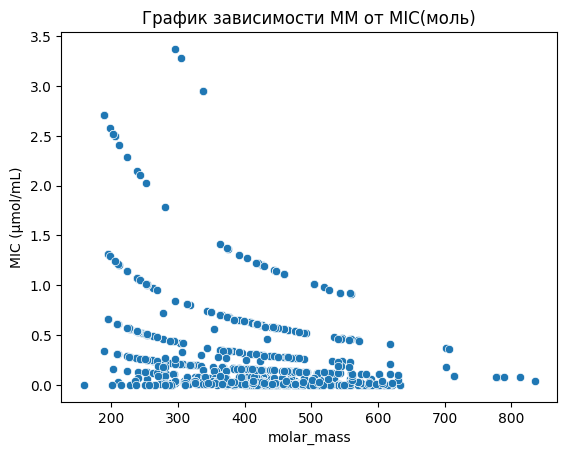

In [112]:

sns.scatterplot(x='molar_mass', y='MIC (µmol/mL)', data=ds_cleaned)

plt.xlabel('molar_mass')
plt.ylabel('MIC (µmol/mL)')

plt.title('График зависимости MM от MIC(моль)')
plt.show()

In [113]:
fig = px.scatter(ds_cleaned, x='molar_mass', y='MIC (µmol/mL)',
                 title='Scatter Plot: molar_mass vs MIC (µmol/mL)',
                 labels={'molar_mass': 'Molar Mass', 'MIC (µmol/mL)': 'MIC (µmol/mL)'})

fig.show()

In [123]:
fig = px.pie(ds_cleaned, names='bacteria', 
             title='Распределение бактерий', 
             hole=0.6)

fig.show()